In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Лабораторная работа №3. Вариант №1.

## Цель

Методом Рунге-Кутты 4 порядка точности решить задачу Коши на интервале $x \in (1, 2)$ с точностью $\varepsilon = 10^{-4}$
$$ 2x^2 y y_x' + y^2 = 2x^3 + x^2 \hspace{1cm} y(1) = 1 $$

Или
$$ y_x' = \frac{2x^3 + x^2 - y^2}{2x^2y} $$

При решении я буду пользоваться заранее подготовленной реализацией функции решающей **систему** ОДУ с заданной точностью

In [2]:
def solve_odesystem(ode_system: 'cuple of functions-list and 1Darray initial conditions',
               RK_method: 'cuple of params-list like [A, b, c] and accuracy order',
               integration_segment: '[t_0, t_N]', N0, epsilon: 'accuracy' = 0):
    """Решает систему ОДУ с заданной точностью"""

    def runge_kutta_odesystem(ode_sys, rk_method, integration_seg, n):
        """Решает систему ОДУ методом Рунге-Кутты"""
        f, r0 = ode_sys
        (A, b, c), accuracy_order = rk_method
        sys_order = r0.size
        r = [r0]
        t_grid, h = np.linspace(*integration_seg, n, retstep=True)
        for n, tn in enumerate(t_grid[:-1]):
            K = np.array([[f[i](t=tn, r=r[n])] for i in range(sys_order)])
            for j in range(1, accuracy_order):
                p = np.array([A[j][:j] @ K[i] for i in range(sys_order)])
                Kj = np.array([f[i](t=(tn + c[j]*h), r=(r[n] + h*p)) for i in range(sys_order)])
                K = np.hstack([K, np.transpose([Kj])])
            r.append(r[n] + h*(K @ b))
        return t_grid, np.array(r)
    
    t_grid, r = runge_kutta_odesystem(ode_system, RK_method, integration_segment, N0)
    if epsilon:
        sigma = 2 * epsilon
        k = 1
        R = [r]
        while np.all(sigma > epsilon):
            k *= 2
            R.append(runge_kutta_odesystem(ode_system, RK_method, integration_segment, N*k - 1)[1][::k])
            diff = np.absolute(R[-2] - R[-1])
            sigma = diff.max(axis=0)/(2**rk_method[1] - 1)
        return t_grid, np.array(r), sigma
    return t_grid, np.array(r)

## Задаем функцию определяющую $y_x'$

Поскольку функция написана, чтобы решать системы ОДУ, необходимо представить нашу задачу Коши, как систему из одного уравнения.

Поэтому всюду далее введены особые обозначения: $\vec{r} \equiv (y)^T$, $\vec{r}_0 \equiv (y_0)^T$, $t \equiv x$

In [3]:
def f(*, t=0, r=[0, 0, 0]):
    r = np.array(r)
    return (2*t**3 + t**2 - r[0]**2)/(2*t**2 * r[0])

r0 = np.array([1])
ode_system = ([f], r0)
integration_segment = [1, 2]
N = 11

## Классический 4-стадийный метод РК 4-го порядка

In [4]:
c = np.array([0, 0.5, 0.5, 1])
b = np.array([1/6, 2/6, 2/6, 1/6])
A = np.array([[0  , 0  , 0, 0],
              [0.5, 0  , 0, 0],
              [0  , 0.5, 0, 0],
              [0  , 0  , 1, 0]])
accuracy_order = 4
rk_method = ([A, b, c], accuracy_order)

In [5]:
epsilon = 1e-4 # точность
x, r, sigma = solve_odesystem(ode_system, rk_method, integration_segment, N, epsilon)
y, = r.T

x: [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
y: [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
accuracy: [2.96059473e-17]


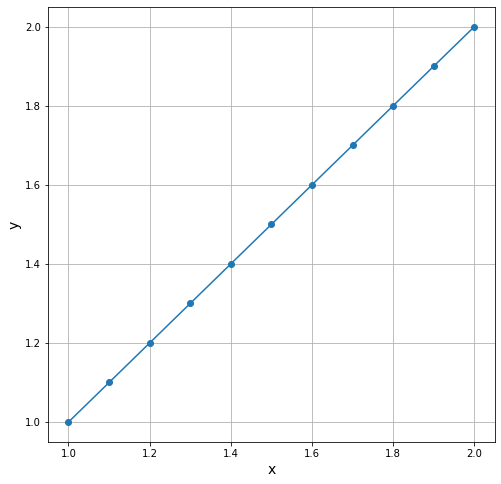

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o-')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
print(f'x: {x}')
print(f'y: {y}')
print(f'accuracy: {sigma}')